In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("concrete_data.csv")
print(data)

      cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0               1040.0            676.0   28                          79.99  
1  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
print(data.isnull().sum())

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


In [5]:
data.duplicated().sum()

25

In [6]:
data.drop_duplicates(inplace = True)

In [7]:
print(data.describe())

            cement  blast_furnace_slag      fly_ash        water  \
count  1005.000000         1005.000000  1005.000000  1005.000000   
mean    278.631343           72.043483    55.536318   182.075323   
std     104.344261           86.170807    64.207969    21.339334   
min     102.000000            0.000000     0.000000   121.800000   
25%     190.700000            0.000000     0.000000   166.600000   
50%     265.000000           20.000000     0.000000   185.700000   
75%     349.000000          142.500000   118.300000   192.900000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate           age  \
count       1005.000000       1005.000000      1005.000000  1005.000000   
mean           6.033234        974.376816       772.688259    45.856716   
std            5.919967         77.579667        80.340435    63.734692   
min            0.000000        801.000000       594.000000     1.000000   
25%         

In [8]:
print(data.corr())

                                 cement  blast_furnace_slag   fly_ash  \
cement                         1.000000           -0.303324 -0.385610   
blast_furnace_slag            -0.303324            1.000000 -0.312352   
fly_ash                       -0.385610           -0.312352  1.000000   
water                         -0.056625            0.130262 -0.283314   
superplasticizer               0.060906            0.019800  0.414213   
coarse_aggregate              -0.086205           -0.277559 -0.026468   
fine_aggregate                -0.245375           -0.289685  0.090262   
age                            0.086348           -0.042759 -0.158940   
concrete_compressive_strength  0.488283            0.103374 -0.080648   

                                  water  superplasticizer  coarse_aggregate  \
cement                        -0.056625          0.060906         -0.086205   
blast_furnace_slag             0.130262          0.019800         -0.277559   
fly_ash                       -0

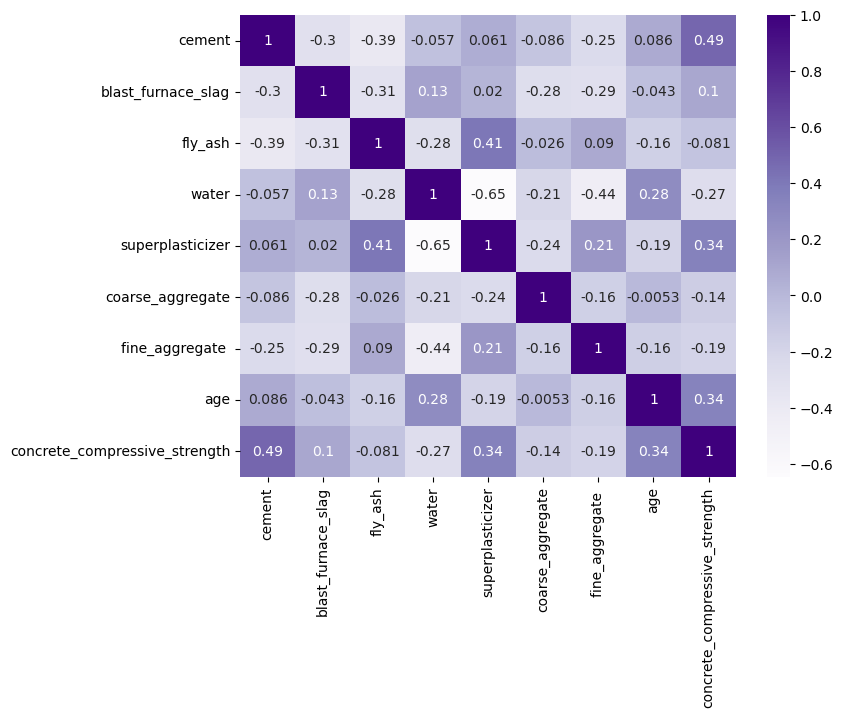

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Purples)
plt.show()

In [10]:
x = data.loc[:,data.columns != "concrete_compressive_strength"]
y = data.loc[:,data.columns == "concrete_compressive_strength"]
X = x.values
Y = y.values
print(X)
print(Y)

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]
[[79.99]
 [61.89]
 [40.27]
 ...
 [23.7 ]
 [32.77]
 [32.4 ]]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33,random_state=42)

In [12]:
def plot_comparison (y_test, y_pred) :
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.scatter(y_test, y_test, color='red', alpha=0.7)  # Plotting original values
    plt.plot(y_test, y_test, color='green')  # Regression line
    plt.title('Comparison: Predicted vs Original Values')
    plt.xlabel('Original Values')
    plt.ylabel('Predicted Values')
    plt.legend(["Regression Line", "Predicted", "Original"])
    plt.grid(True)
    plt.show()

In [13]:
def evaluate_predictions (y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

# Linear Regression
<br>

In [14]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
evaluate_predictions (y_test, y_pred)

Mean Squared Error: 125.67073068584229
R-squared Score: 0.5646489995545294


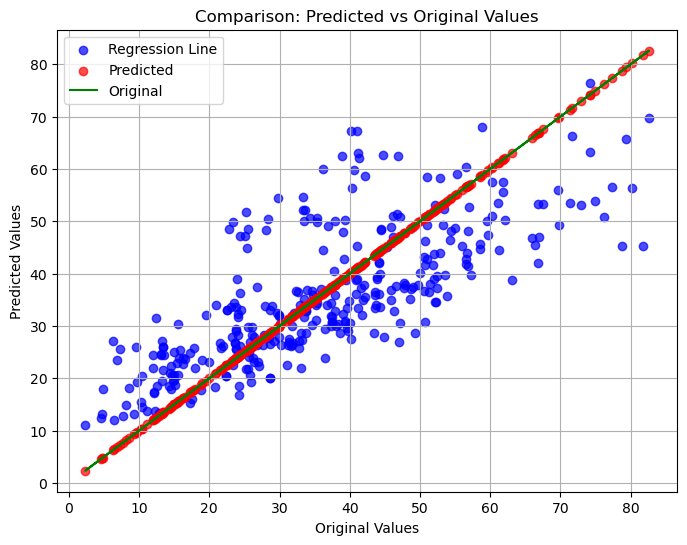

In [15]:
plot_comparison(y_test, y_pred)

# Polynomial Regression
<br>

In [16]:
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
evaluate_predictions (y_test, y_pred)

Mean Squared Error: 125.67073068584229
R-squared Score: 0.5646489995545294


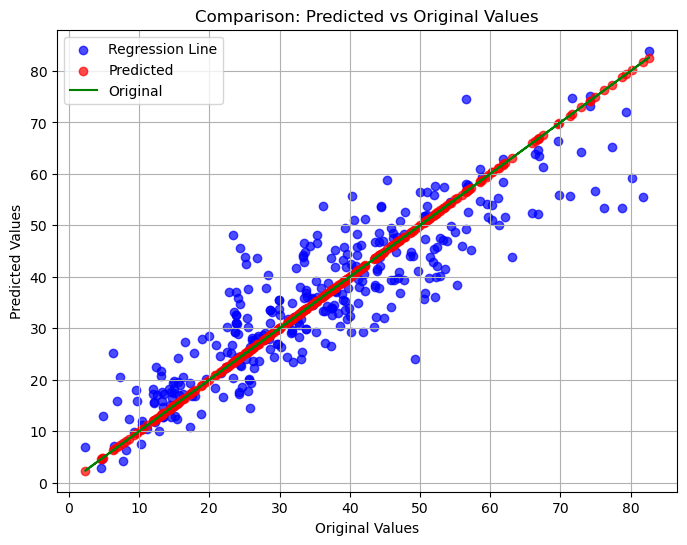

In [17]:
y_pred = lin_reg2.predict(poly_reg.fit_transform(x_test))
plot_comparison(y_test, y_pred)

# Support Vector Machine
<br>

In [18]:
scaler1 = StandardScaler()
x_train_scaled = scaler1.fit_transform(x_train)
x_test_scaled = scaler1.fit_transform(x_test)
scaler2 = StandardScaler()
y_test_scaled = scaler2.fit_transform(y_test)
y_train_scaled = scaler2.fit_transform(y_train)

In [19]:
svr_reg = SVR(kernel="rbf")
svr_reg.fit(x_train_scaled,y_train_scaled.ravel())
y_pred = svr_reg.predict(x_test_scaled)
evaluate_predictions (y_test_scaled, y_pred)

Mean Squared Error: 0.20808790206494954
R-squared Score: 0.7919120979350505


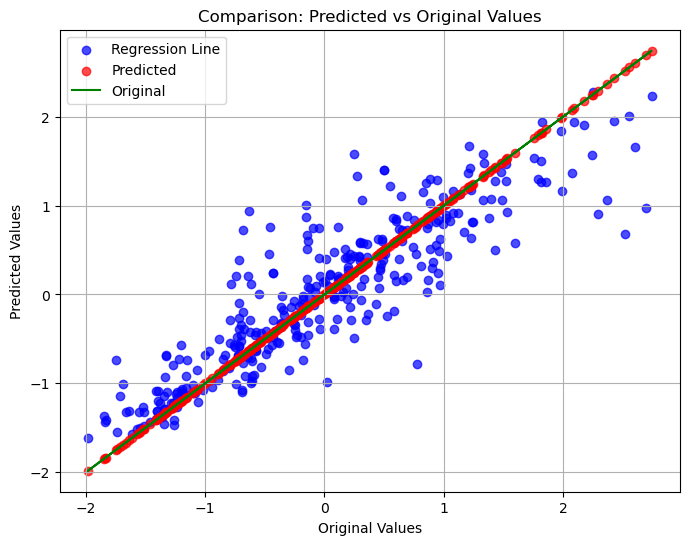

In [20]:
plot_comparison(y_test_scaled, y_pred)

# Decision Tree
<br>

In [21]:
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(x_train,y_train)
y_pred = r_dt.predict(x_test)
evaluate_predictions (y_test, y_pred)

Mean Squared Error: 42.088483810240966
R-squared Score: 0.8541962521103919


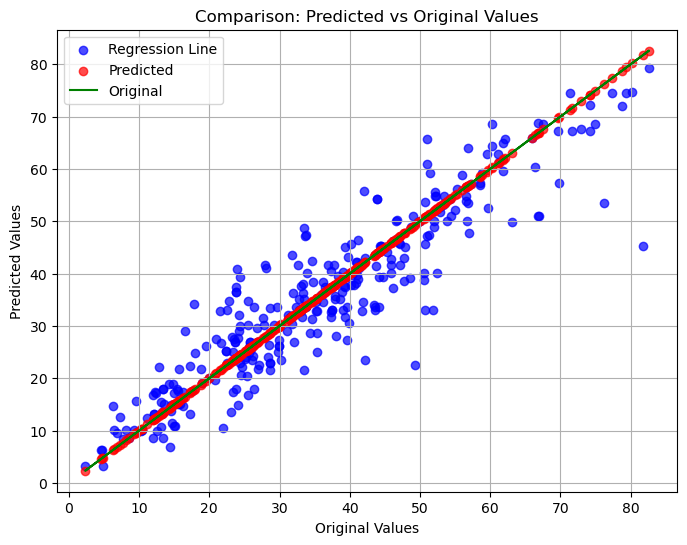

In [22]:
plot_comparison(y_test, y_pred)

# Random Forest
<br>

In [23]:
rf_reg = RandomForestRegressor(n_estimators=10,random_state=0)
rf_reg.fit(x_train,y_train.ravel())
y_pred = rf_reg.predict(x_test)
evaluate_predictions (y_test, y_pred)

Mean Squared Error: 31.40501418349732
R-squared Score: 0.8912061363121363


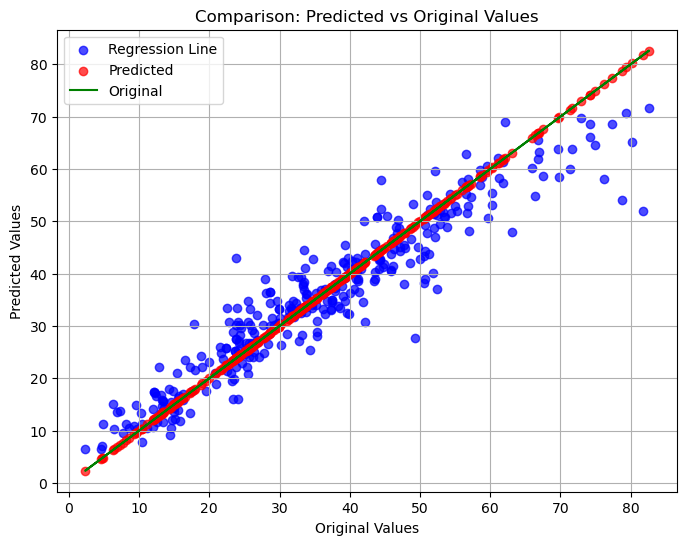

In [24]:
plot_comparison(y_test, y_pred)